In [1]:
import fastbook
fastbook.setup_book()

/home/farruh/anaconda3/envs/fastai/lib/python3.8/site-packages/fastbook/__init__.py:22: UserWarning: Missing `graphviz` - please run `conda install fastbook`
  except ModuleNotFoundError: warn("Missing `graphviz` - please run `conda install fastbook`")


In [2]:
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
path = untar_data(URLs.CIFAR)
path # output >>> PosixPath('/home/jupyter/.fastai/data/cifar10')
# dataset folder structure
path.ls() # output >>> ['test', 'labels.txt', 'train']

In [3]:
# batch size
bs = 64 
# image size
img_size = 24

In [4]:
path = Path('cifar10')
path.ls()

(#3) [Path('cifar10/labels.txt'),Path('cifar10/test'),Path('cifar10/train')]

In [5]:
!ls cifar10/train

airplane  automobile  bird  cat  deer  dog  frog  horse  ship  truck


In [6]:
files = get_image_files(path/"train")
len(files)

50000

In [8]:
cifar = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(img_size)
)

In [9]:
dls = cifar.dataloaders(path)

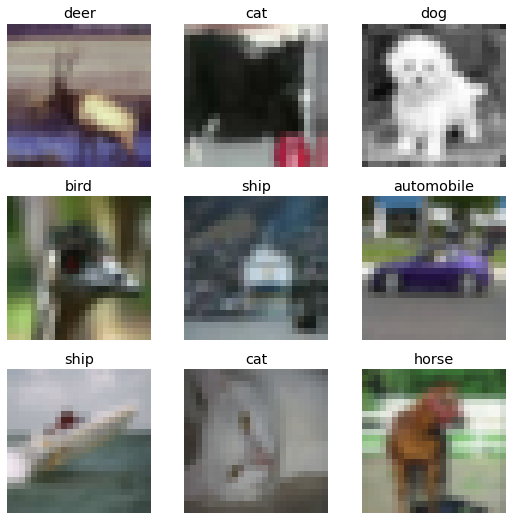

In [10]:
dls.show_batch()

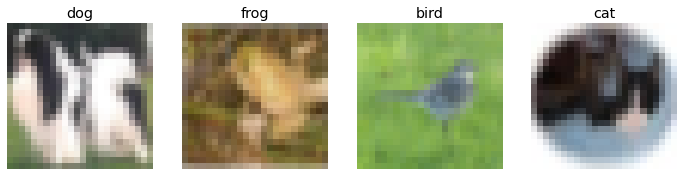

In [11]:
dls.valid.show_batch(max_n=4, nrows=1)

In [12]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /home/farruh/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.783859,1.608046,0.571000,17:06


epoch,train_loss,valid_loss,error_rate,time
0,1.129270,1.030994,0.360500,01:38
1,0.930729,0.824883,0.287500,01:06
2,0.689004,0.749836,0.261333,01:08
3,0.493457,0.767125,0.257250,01:07


SuggestedLRs(lr_min=6.309573450380412e-08, lr_steep=9.999999747378752e-06)

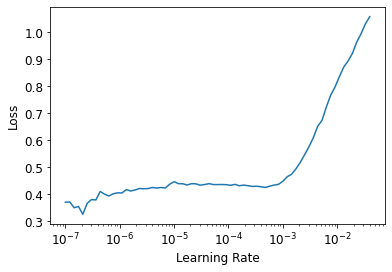

In [13]:
learn.lr_find()

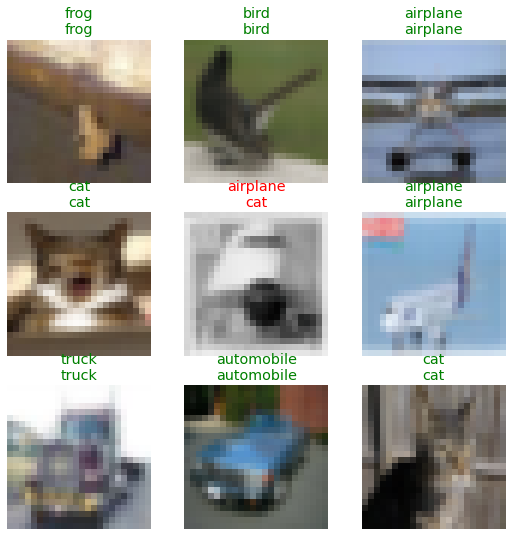

In [14]:
learn.show_results()

In [15]:
interp = Interpretation.from_learner(learn)

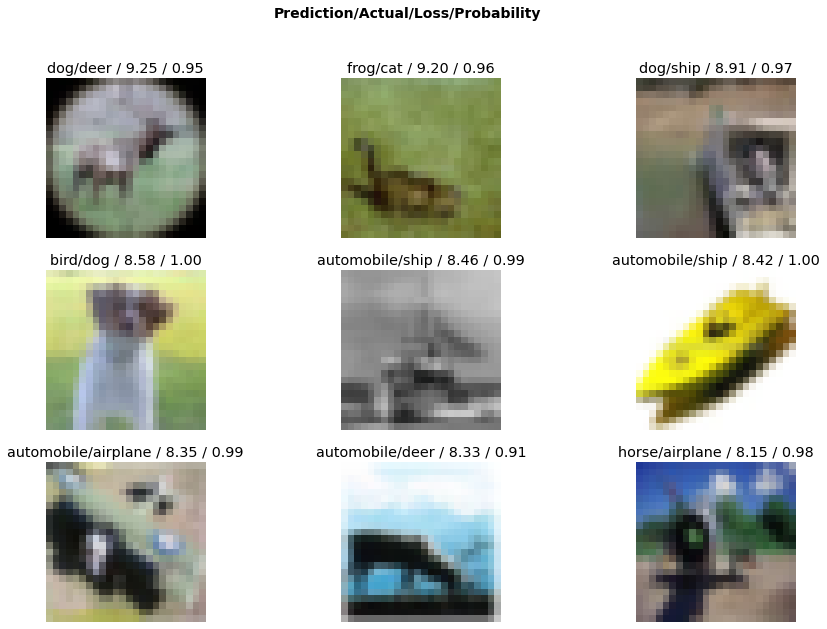

In [16]:
interp.plot_top_losses(9, figsize=(15,10))

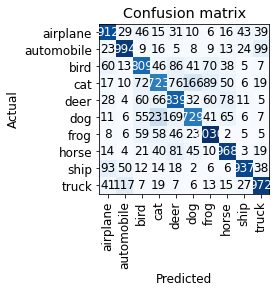

In [17]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

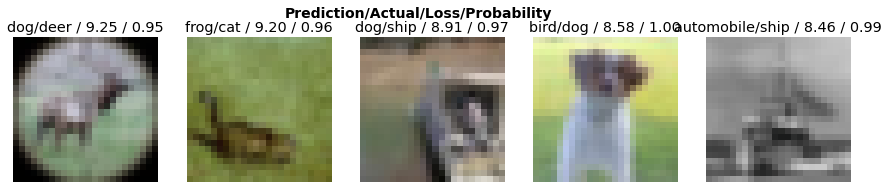

In [18]:
interp.plot_top_losses(5, nrows=1)

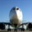

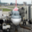

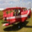

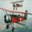

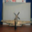

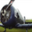

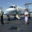

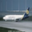

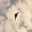

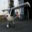

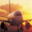

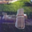

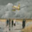

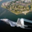

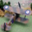

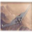

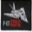

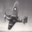

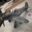

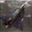

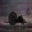

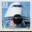

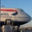

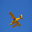

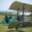

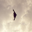

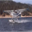

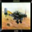

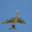

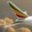

In [19]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [20]:
# for idx in clearner.delete(): cleanrer.fns[idx].unlink()
# for idx, cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [21]:
learn.export()

In [22]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [23]:
learn_inf = load_learner(path/'export.pkl')

In [26]:
learn_inf.predict('deer.jpeg')

('deer',
 tensor(4),
 tensor([1.2006e-03, 4.7383e-05, 6.5634e-03, 2.5673e-04, 9.8939e-01, 2.2574e-04, 3.2938e-04, 5.6489e-04, 1.3997e-03, 2.3238e-05]))

In [27]:
learn_inf.dls.vocab

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [28]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [33]:
btn_upload = SimpleNamespace(data = ['deer.jpeg'])

In [34]:
img = PILImage.create(btn_upload.data[0])

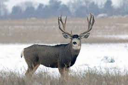

Output()

In [35]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128, 128))
out_pl

In [36]:
pred, pred_idx, probs = learn_inf.predict(img)

In [37]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: deer; Probability: 0.9894')

In [38]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [39]:
def on_click_classify(change):
  img = PILImage.create(btn_upload.data[-1])
  out_pl.clear_output()
  with out_pl: display(img.to_thumb(128, 1228))
  pred, pred_idx, probs = learn_inf.predict(img)
  lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [40]:
btn_upload = widgets.FileUpload()

In [41]:
VBox([widgets.Label('Select your bear!'),
      btn_upload, btn_run, out_pl, lbl_pred])

In [42]:
!pip install voila

  Using cached voila-0.2.4-py3-none-any.whl (1.9 MB)
     |████████████████████████████████| 552 kB 26 kB/s eta 0:00:01
     |████████████████████████████████| 223 kB 128 kB/s eta 0:00:01
  Attempting uninstall: nbconvert
    Found existing installation: nbconvert 5.6.1
    Uninstalling nbconvert-5.6.1:
      Successfully uninstalled nbconvert-5.6.1
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

nbdev 1.1.5 requires nbconvert<6, but you'll have nbconvert 6.0.7 which is incompatible.
Enabling: voila
- Writing config: /home/farruh/.jupyter
    - Validating...
      voila 0.2.4 OK
Enabling: —sys-prefix
- Writing config: /home/farruh/.jupyter
    - Validating...
Error loading server extension —sys-prefix
      X is —sys-prefix importable?


In [1]:
!jupyter serverextension enable voila —sys-prefix

Enabling: voila
- Writing config: /home/farruh/.jupyter
    - Validating...
      voila 0.2.4 OK
Enabling: —sys-prefix
- Writing config: /home/farruh/.jupyter
    - Validating...
Error loading server extension —sys-prefix
      X is —sys-prefix importable?
